In [136]:
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import play as lib
from binance.client import Client

## Fetch data

In [137]:
client = lib.get_client()
ONE_HOUR_IN_MS=60 * 60 * 1000
ONE_DAY_IN_MS=24 * ONE_HOUR_IN_MS
ONE_MONTH_IN_MS=30 * ONE_DAY_IN_MS

PAIR_DIC = {
  "MATIC": ["MATICUSDT", './out/pair_MATICUSDT.pkl'],
  "BNB": ["BNBUSDT", './out/pair_BNBUSDT.pkl']
}

In [138]:
def pull_data(PAIR_NAME: str, DATA_FILE: str):
  now = math.floor(time.time() * 1000)
  df = lib.fetch_price(client, PAIR_NAME, now - 3 * ONE_MONTH_IN_MS, now, Client.KLINE_INTERVAL_1HOUR)
  print(df)
  print(df.describe())
  f = plt.figure()
  f.set_figwidth(24)
  plt.plot(df["close_time"], df["close_price"])
  df.to_pickle(DATA_FILE)
  print("Saved to: ", DATA_FILE)


### MATIC

                  close_time  close_price
0    2022-10-28 11:59:59.999       0.9063
1    2022-10-28 12:59:59.999       0.9118
2    2022-10-28 13:59:59.999       0.9254
3    2022-10-28 14:59:59.999       0.9285
4    2022-10-28 15:59:59.999       0.9292
...                      ...          ...
2155 2023-01-26 06:59:59.999       1.0014
2156 2023-01-26 07:59:59.999       0.9947
2157 2023-01-26 08:59:59.999       0.9993
2158 2023-01-26 09:59:59.999       0.9995
2159 2023-01-26 10:59:59.999       0.9998

[2160 rows x 2 columns]
       close_price
count  2160.000000
mean      0.896666
std       0.099070
min       0.748400
25%       0.809050
50%       0.890050
75%       0.939525
max       1.273200
Saved to:  ./out/pair_MATICUSDT.pkl


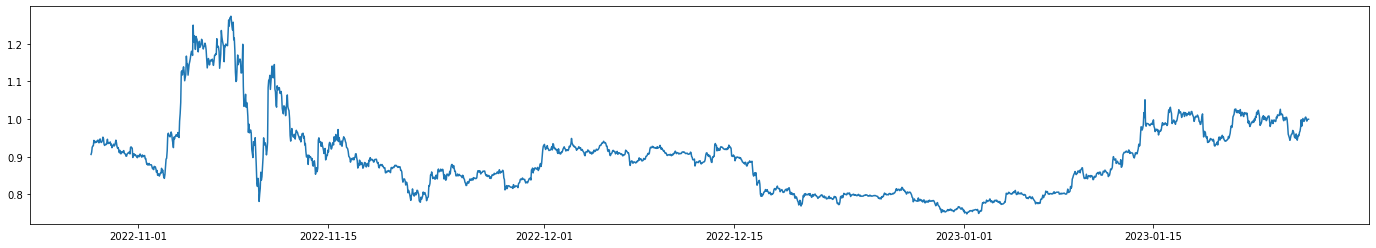

In [139]:
pull_data(PAIR_DIC["MATIC"][0], PAIR_DIC["MATIC"][1])

### BNB

                  close_time  close_price
0    2022-10-28 11:59:59.999        287.8
1    2022-10-28 12:59:59.999        289.6
2    2022-10-28 13:59:59.999        292.7
3    2022-10-28 14:59:59.999        293.9
4    2022-10-28 15:59:59.999        296.8
...                      ...          ...
2155 2023-01-26 06:59:59.999        307.9
2156 2023-01-26 07:59:59.999        305.9
2157 2023-01-26 08:59:59.999        305.0
2158 2023-01-26 09:59:59.999        304.5
2159 2023-01-26 10:59:59.999        304.5

[2160 rows x 2 columns]
       close_price
count  2160.000000
mean    282.797130
std      27.847808
min     225.400000
25%     258.875000
50%     286.000000
75%     300.800000
max     375.400000
Saved to:  ./out/pair_BNBUSDT.pkl


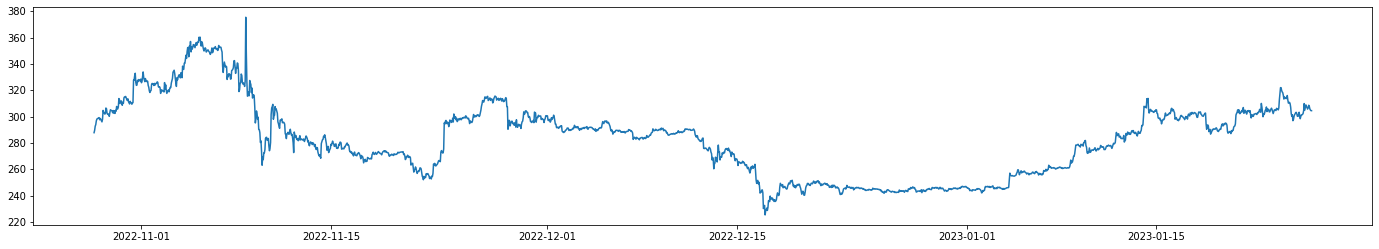

In [140]:
pull_data(PAIR_DIC["BNB"][0], PAIR_DIC["BNB"][1])

# Prophet

In [141]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


In [142]:
def prophet_model(data_path: str):
  print("DATA_SOURCE", data_path)
  df = pd.read_pickle(data_path)
  df = df.rename(columns={"close_time": "ds", "close_price": "y"})
  m = Prophet()
  m.fit(df)

  future = m.make_future_dataframe(periods=5)
  print(future.tail())
  forecast = m.predict(future)
  print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

  fig1 = m.plot(forecast)
  fig1.set_figwidth(24)

  fig2 = m.plot_components(forecast)
  fig2.set_figwidth(24)

  fig = m.plot(forecast)
  fig.set_figwidth(24)
  a = add_changepoints_to_plot(fig.gca(), m, forecast)

  return m,future,forecast
  

17:10:52 - cmdstanpy - INFO - Chain [1] start processing


DATA_SOURCE ./out/pair_MATICUSDT.pkl


17:10:53 - cmdstanpy - INFO - Chain [1] done processing


                          ds
2160 2023-01-27 10:59:59.999
2161 2023-01-28 10:59:59.999
2162 2023-01-29 10:59:59.999
2163 2023-01-30 10:59:59.999
2164 2023-01-31 10:59:59.999
                          ds      yhat  yhat_lower  yhat_upper
2160 2023-01-27 10:59:59.999  1.072263    1.021781    1.123344
2161 2023-01-28 10:59:59.999  1.083014    1.033500    1.138299
2162 2023-01-29 10:59:59.999  1.082522    1.024360    1.139229
2163 2023-01-30 10:59:59.999  1.094432    1.024701    1.159584
2164 2023-01-31 10:59:59.999  1.108463    1.035559    1.181887


(<prophet.forecaster.Prophet at 0x1243f5a60>,
                           ds
 0    2022-10-28 11:59:59.999
 1    2022-10-28 12:59:59.999
 2    2022-10-28 13:59:59.999
 3    2022-10-28 14:59:59.999
 4    2022-10-28 15:59:59.999
 ...                      ...
 2160 2023-01-27 10:59:59.999
 2161 2023-01-28 10:59:59.999
 2162 2023-01-29 10:59:59.999
 2163 2023-01-30 10:59:59.999
 2164 2023-01-31 10:59:59.999
 
 [2165 rows x 1 columns],
                           ds     trend  yhat_lower  yhat_upper  trend_lower  \
 0    2022-10-28 11:59:59.999  0.898035    0.861061    0.962114     0.898035   
 1    2022-10-28 12:59:59.999  0.898108    0.857507    0.963220     0.898108   
 2    2022-10-28 13:59:59.999  0.898181    0.866082    0.965143     0.898181   
 3    2022-10-28 14:59:59.999  0.898254    0.859185    0.961430     0.898254   
 4    2022-10-28 15:59:59.999  0.898327    0.862149    0.964737     0.898327   
 ...                      ...       ...         ...         ...          ...   
 2160 

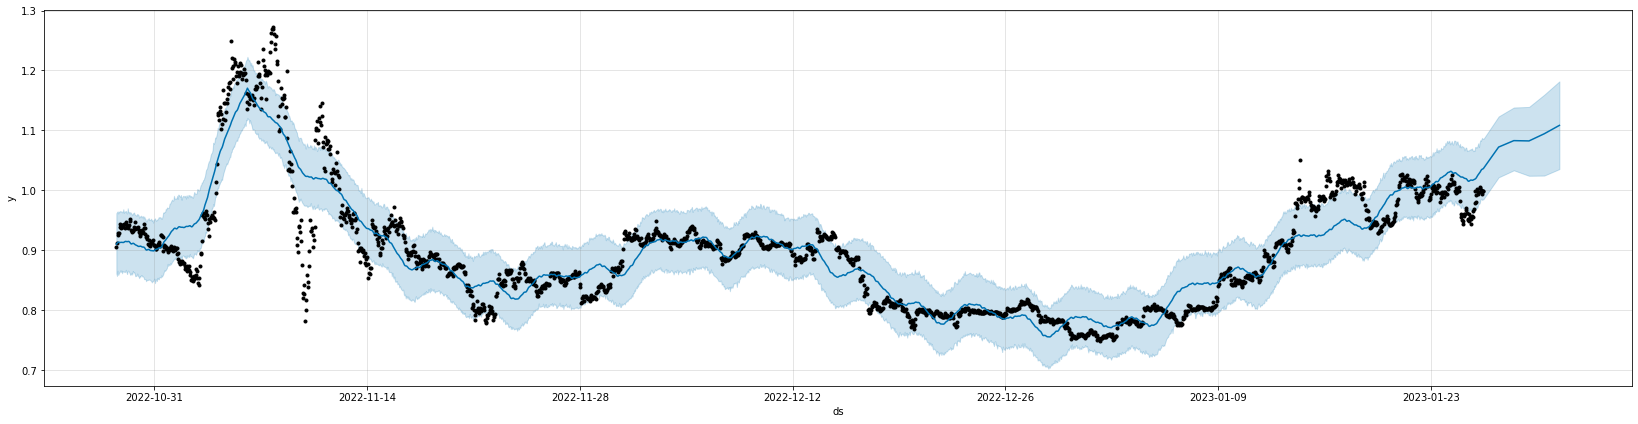

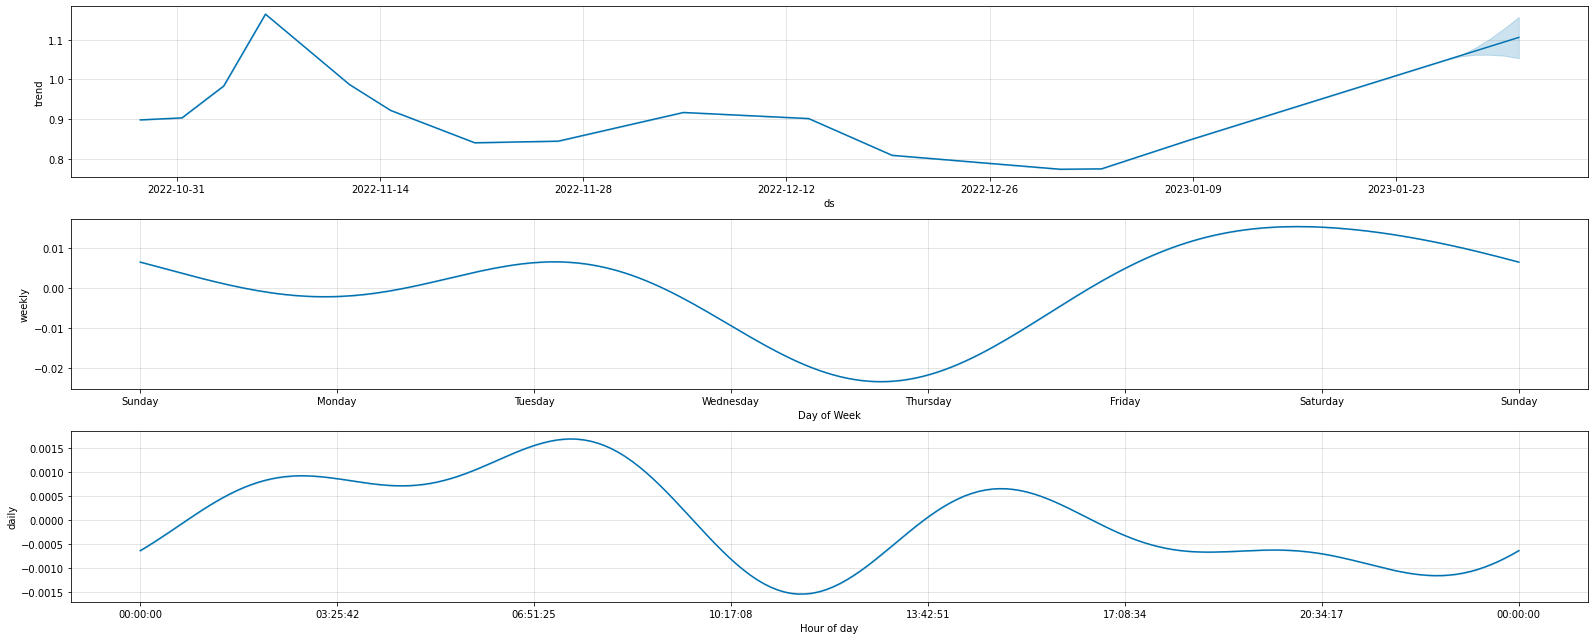

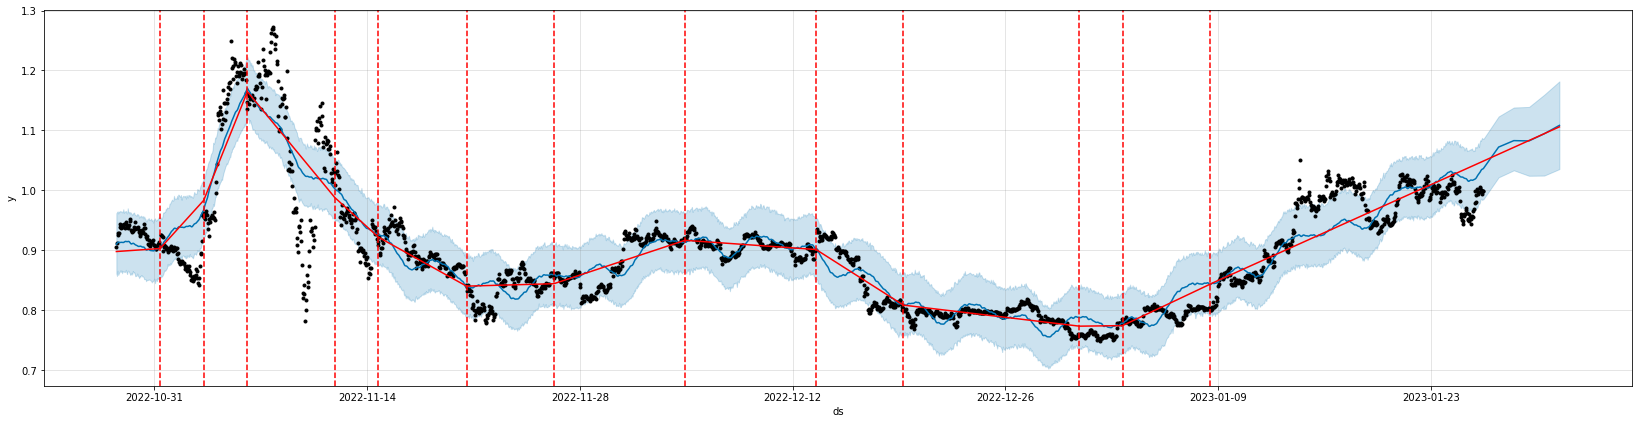

In [143]:
prophet_model(PAIR_DIC["MATIC"][1])

DATA_SOURCE ./out/pair_BNBUSDT.pkl


17:10:55 - cmdstanpy - INFO - Chain [1] start processing
17:10:56 - cmdstanpy - INFO - Chain [1] done processing


                          ds
2160 2023-01-27 10:59:59.999
2161 2023-01-28 10:59:59.999
2162 2023-01-29 10:59:59.999
2163 2023-01-30 10:59:59.999
2164 2023-01-31 10:59:59.999
                          ds        yhat  yhat_lower  yhat_upper
2160 2023-01-27 10:59:59.999  316.766678  308.274260  325.626837
2161 2023-01-28 10:59:59.999  319.249042  309.679637  328.603996
2162 2023-01-29 10:59:59.999  322.829855  312.437282  333.639878
2163 2023-01-30 10:59:59.999  323.112231  309.622288  335.809244
2164 2023-01-31 10:59:59.999  325.347439  308.227208  340.311568


(<prophet.forecaster.Prophet at 0x12111dfd0>,
                           ds
 0    2022-10-28 11:59:59.999
 1    2022-10-28 12:59:59.999
 2    2022-10-28 13:59:59.999
 3    2022-10-28 14:59:59.999
 4    2022-10-28 15:59:59.999
 ...                      ...
 2160 2023-01-27 10:59:59.999
 2161 2023-01-28 10:59:59.999
 2162 2023-01-29 10:59:59.999
 2163 2023-01-30 10:59:59.999
 2164 2023-01-31 10:59:59.999
 
 [2165 rows x 1 columns],
                           ds       trend  yhat_lower  yhat_upper  trend_lower  \
 0    2022-10-28 11:59:59.999  296.895977  288.182974  306.188639   296.895977   
 1    2022-10-28 12:59:59.999  297.160774  289.126035  305.582902   297.160774   
 2    2022-10-28 13:59:59.999  297.425571  288.962758  306.631105   297.425571   
 3    2022-10-28 14:59:59.999  297.690368  289.560529  306.981491   297.690368   
 4    2022-10-28 15:59:59.999  297.955164  289.615112  308.011447   297.955164   
 ...                      ...         ...         ...         ...         

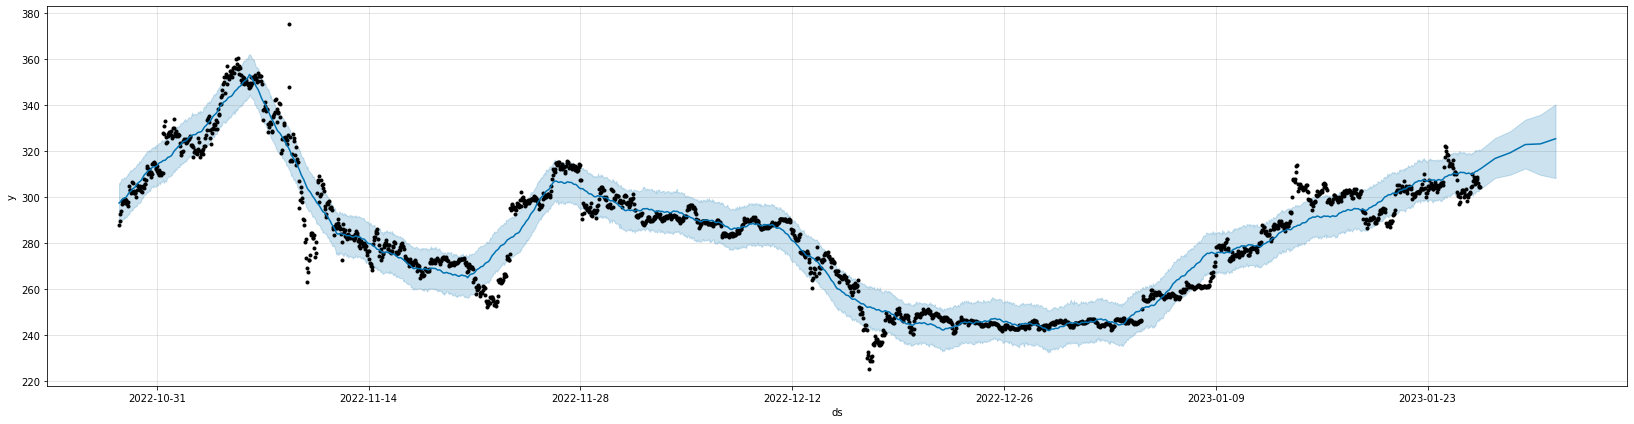

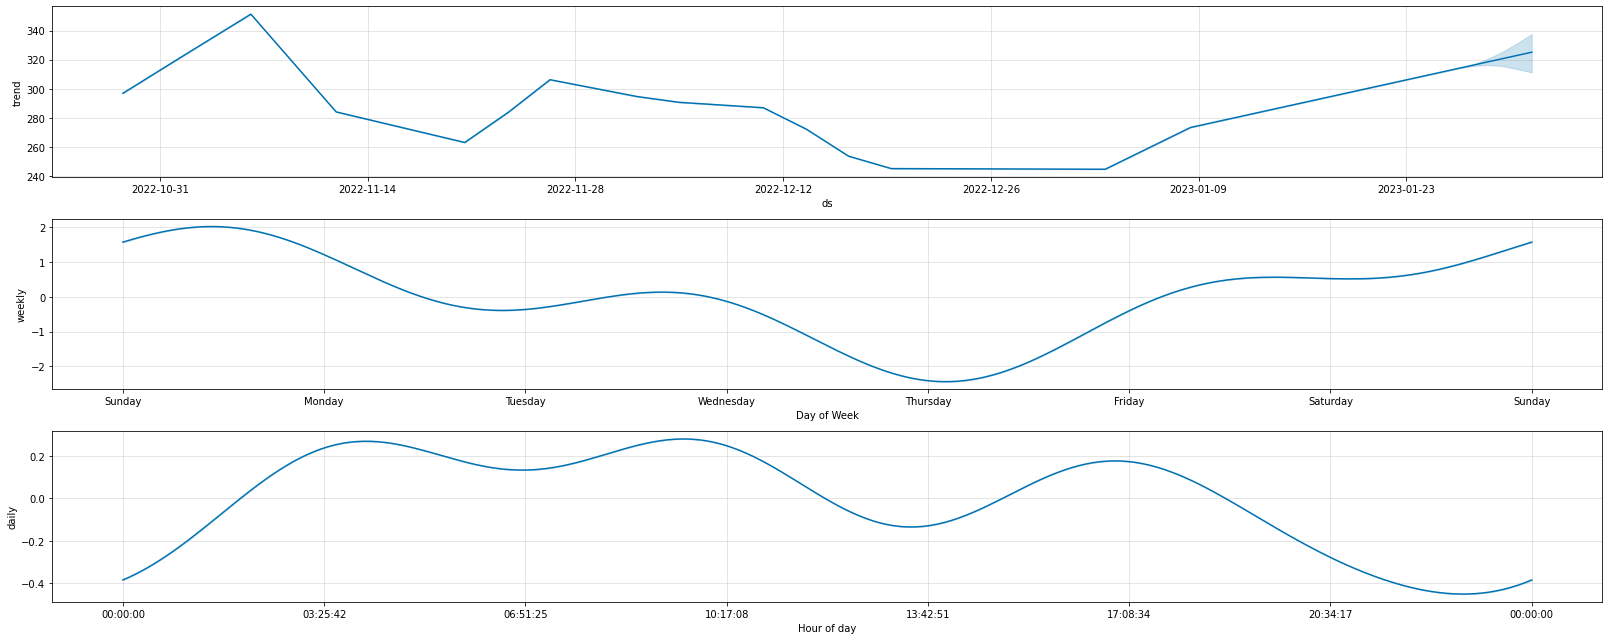

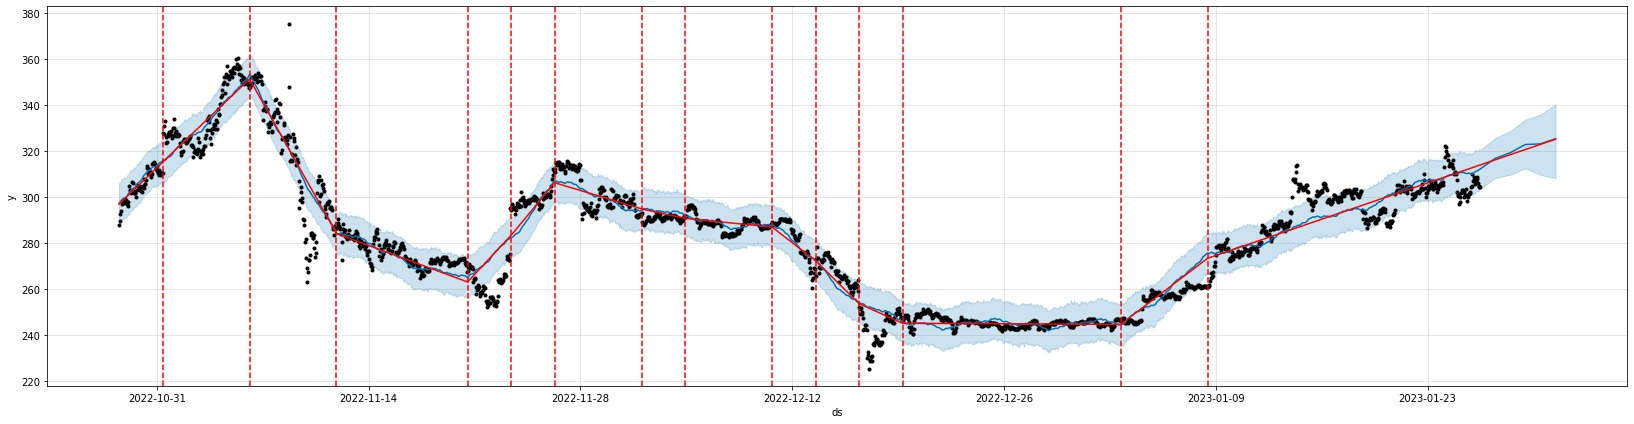

In [144]:
prophet_model(PAIR_DIC["BNB"][1])